# Jupyter Hub-Api tutorial

## Get data from the hub-api

In [ ]:
import os
import requests

url = 'https://api.hub.coda19.com/stats/summarize?sites=115'
token = os.environ['OAUTH_TOKEN'] # Note: token has a lifespan of 4 hours. After which the notebook server must be stopped (File/Hub Control Pannel) and a login must be redone.
header = {
    "Authorization": f'Bearer {token}'
}

body = {
    "selectors": [
        {
            "resource": "Observation",
            "filters": [
                {
                    "path": "code.coding.code",
                    "operator": "is",
                    "value": "94500-6"
                },
                { 
                    "path": "interpretation.coding.display",
                    "operator": "is",
                    "value": "positive"
                },
                {
                    "path": "issued",
                    "operator": "afterOrOn",
                    "value": "2021-01-01"
                },
                {
                    "path": "issued",
                    "operator": "before",
                    "value": "2021-04-06"
                }
            ],
            "fields": [],
            "breakdown": {
                "resource": {
                    "type": "Observation",
                    "field": "issued"
                },
                "slices": {
                    "step": 86400,
                    "min": "2021-01-01",
                    "max": "2021-04-06"
                }
            }
        }
    ],
    "options": {
        "measures": {
            "continuous": [],
            "categorical": [
                "count"
            ]
        }
    }
}

# This request takes some time, so be patient before executing next cells and wait for the done output
result = requests.get(url=url, headers=header, json=body).json()
print('done')

## Visualize results

In [ ]:
!pip install pandas matplotlib # For minimal notebook only

In [46]:
import pandas as pd
import numpy as np
from dateutil import parser

import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

breakdowns = result[0][0]['breakdown']['result']
grouped_breakdowns = []

group_size = 9

for cur_group_index in range(0, len(breakdowns), group_size):
    group_end_index = min(cur_group_index + group_size, len(breakdowns))
    
    group_initial_period = breakdowns[cur_group_index]
    period = {
        'periodStart': parser.parse(group_initial_period['periodStart']),
        'periodCount': 0
    }
    
    grouped_breakdowns.append(period)
    
    for cur_item in range(cur_group_index, group_end_index):
        cur_period = breakdowns[cur_item]
        period['periodCount'] += cur_period['periodCount']
        

df = pd.DataFrame.from_dict(grouped_breakdowns)

# Show the data
df

,periodStart,periodCount
0,2021-01-01 00:00:00+00:00,1465
1,2021-01-10 00:00:00+00:00,1072
2,2021-01-19 00:00:00+00:00,686
3,2021-01-28 00:00:00+00:00,469
4,2021-02-06 00:00:00+00:00,333
5,2021-02-15 00:00:00+00:00,277
6,2021-02-24 00:00:00+00:00,336
7,2021-03-05 00:00:00+00:00,344
8,2021-03-14 00:00:00+00:00,435
9,2021-03-23 00:00:00+00:00,1439


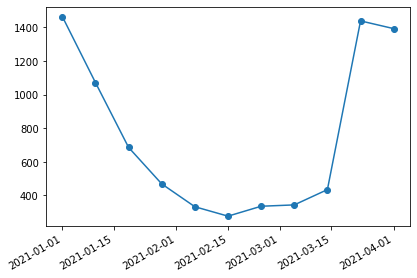

In [47]:
# Visualize the data
plt.plot_date(df.periodStart, df.periodCount, linestyle ='solid')
plt.tight_layout()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()